In [2]:
import pandas as pd

data = pd.read_csv('yeast.data', delim_whitespace=True, header=None)
data.columns = ['Sequence Name', 'mcg', 'gvh', 'alm', 'mit', 'erl', 'pox', 'vac', 'nuc', 'Class']
print(data.head())

  Sequence Name   mcg   gvh   alm   mit  erl  pox   vac   nuc Class
0    ADT1_YEAST  0.58  0.61  0.47  0.13  0.5  0.0  0.48  0.22   MIT
1    ADT2_YEAST  0.43  0.67  0.48  0.27  0.5  0.0  0.53  0.22   MIT
2    ADT3_YEAST  0.64  0.62  0.49  0.15  0.5  0.0  0.53  0.22   MIT
3    AAR2_YEAST  0.58  0.44  0.57  0.13  0.5  0.0  0.54  0.22   NUC
4    AATM_YEAST  0.42  0.44  0.48  0.54  0.5  0.0  0.48  0.22   MIT


/var/folders/xh/n_j2f34x3gbbkjmhhfy63yc00000gn/T/ipykernel_60056/3487914543.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv('yeast.data', delim_whitespace=True, header=None)


In [4]:
data.to_csv('yeast.csv', index=False)

In [6]:
# get general info about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1484 entries, 0 to 1483
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sequence Name  1484 non-null   object 
 1   mcg            1484 non-null   float64
 2   gvh            1484 non-null   float64
 3   alm            1484 non-null   float64
 4   mit            1484 non-null   float64
 5   erl            1484 non-null   float64
 6   pox            1484 non-null   float64
 7   vac            1484 non-null   float64
 8   nuc            1484 non-null   float64
 9   Class          1484 non-null   object 
dtypes: float64(8), object(2)
memory usage: 116.1+ KB
None


In [7]:
# get statistical summary of the dataset
print(data.describe())

               mcg          gvh          alm          mit          erl  \
count  1484.000000  1484.000000  1484.000000  1484.000000  1484.000000   
mean      0.500121     0.499933     0.500034     0.261186     0.504717   
std       0.137299     0.123924     0.086670     0.137098     0.048351   
min       0.110000     0.130000     0.210000     0.000000     0.500000   
25%       0.410000     0.420000     0.460000     0.170000     0.500000   
50%       0.490000     0.490000     0.510000     0.220000     0.500000   
75%       0.580000     0.570000     0.550000     0.320000     0.500000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

               pox          vac          nuc  
count  1484.000000  1484.000000  1484.000000  
mean      0.007500     0.499885     0.276199  
std       0.075683     0.057797     0.106491  
min       0.000000     0.000000     0.000000  
25%       0.000000     0.480000     0.220000  
50%       0.000000     0.510000     0.220000  
75% 

In [8]:
print(data['Class'].value_counts())
print(data.isnull().sum())

Class
CYT    463
NUC    429
MIT    244
ME3    163
ME2     51
ME1     44
EXC     35
VAC     30
POX     20
ERL      5
Name: count, dtype: int64
Sequence Name    0
mcg              0
gvh              0
alm              0
mit              0
erl              0
pox              0
vac              0
nuc              0
Class            0
dtype: int64


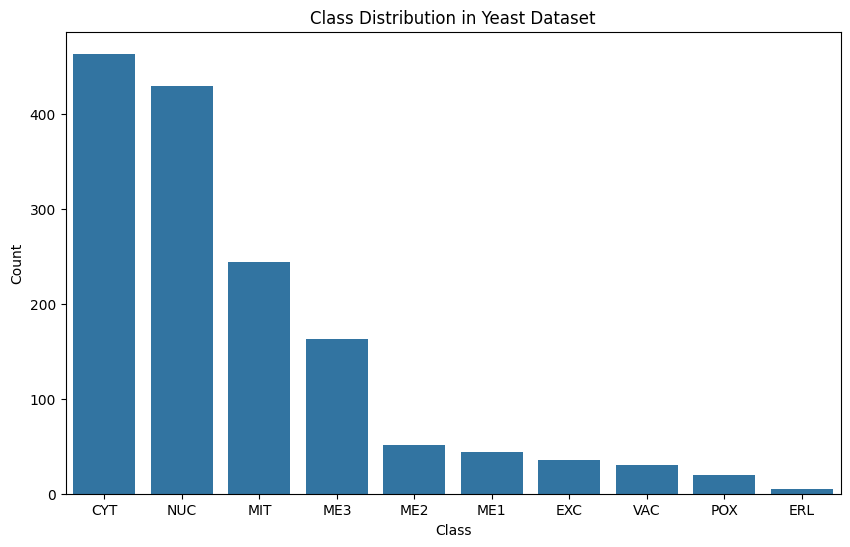

In [15]:
# visualize class distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Class', order=data['Class'].value_counts().index)
plt.title('Class Distribution in Yeast Dataset')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [10]:
# divide data into train, test and validation sets
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data, test_size=0.2, random_state=42, stratify=data['Class'])
train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42, stratify=train_data['Class'])

print(f'Train set size: {train_data.shape}')
print(f'Validation set size: {val_data.shape}')
print(f'Test set size: {test_data.shape}')
train_data.to_csv('yeast_train.csv', index=False)
val_data.to_csv('yeast_val.csv', index=False)
test_data.to_csv('yeast_test.csv', index=False)

Train set size: (949, 10)
Validation set size: (238, 10)
Test set size: (297, 10)


In [12]:
print(train_data['Class'].value_counts())

Class
CYT    296
NUC    274
MIT    156
ME3    105
ME2     33
ME1     28
EXC     22
VAC     19
POX     13
ERL      3
Name: count, dtype: int64


In [13]:
print(val_data['Class'].value_counts())

Class
CYT    74
NUC    69
MIT    39
ME3    26
ME2     8
ME1     7
EXC     6
VAC     5
POX     3
ERL     1
Name: count, dtype: int64


In [14]:
print(test_data['Class'].value_counts())

Class
CYT    93
NUC    86
MIT    49
ME3    32
ME2    10
ME1     9
EXC     7
VAC     6
POX     4
ERL     1
Name: count, dtype: int64
